In [5]:
from datetime import date
import numpy as np
import os
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Settings

In [6]:
dataDir = "./P1_Foodmart"
transaction_filename = "FoodMart-Transactions-1998.csv"
product_filename = "Product-Lookup.csv"
customer_filename = "Customer-Lookup.csv"

# Input

In [7]:
# input: transactions
df_trans = pd.read_csv(transaction_filename)

In [8]:
df_trans.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity
0,1/1/1998,12/25/1997,4,2439,10,3
1,1/1/1998,12/28/1997,11,4284,10,3
2,1/1/1998,12/28/1997,12,534,10,3
3,1/1/1998,12/29/1997,14,9743,10,2
4,1/1/1998,12/27/1997,16,3608,10,3


In [9]:
# input: products
df_prod = pd.read_csv(product_filename)

In [10]:
df_prod.head()

,product_id,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1,Washington,Washington Berry Juice,90748583674,2.85,0.94,8.39,NaN,NaN
1,2,Washington,Washington Mango Drink,96516502499,0.74,0.26,7.42,NaN,1.0
2,3,Washington,Washington Strawberry Drink,58427771925,0.83,0.40,13.10,1.0,1.0
3,4,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
4,5,Washington,Washington Diet Soda,85561191439,2.19,0.77,6.66,1.0,NaN


In [43]:
df_cus = pd.read_csv(customer_filename)

# Data Preprocessing

In [11]:
df_trans["transaction_date"] = pd.to_datetime(df_trans["transaction_date"])
df_trans_1to10 = df_trans[df_trans["transaction_date"].dt.month <= 10]
df_trans_1to10.head()


,transaction_date,stock_date,product_id,customer_id,store_id,quantity
0,1998-01-01,12/25/1997,4,2439,10,3
1,1998-01-01,12/28/1997,11,4284,10,3
2,1998-01-01,12/28/1997,12,534,10,3
3,1998-01-01,12/29/1997,14,9743,10,2
4,1998-01-01,12/27/1997,16,3608,10,3


## RFM: monetary

In [12]:
# look up the price of the product by its product_id
def lookup_price(product_id, df=df_prod):
    return df_prod[df_prod["product_id"]==product_id]["product_retail_price"].values[0]

In [13]:
df_trans_1to10["price"] = [lookup_price(pid) for pid in df_trans_1to10["product_id"]]

C:\Users\vanes\AppData\Local\Temp\ipykernel_2552\3192847065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_1to10["price"] = [lookup_price(pid) for pid in df_trans_1to10["product_id"]]


In [14]:
df_trans_1to10.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,price
0,1998-01-01,12/25/1997,4,2439,10,3,3.64
1,1998-01-01,12/28/1997,11,4284,10,3,3.51
2,1998-01-01,12/28/1997,12,534,10,3,1.54
3,1998-01-01,12/29/1997,14,9743,10,2,1.93
4,1998-01-01,12/27/1997,16,3608,10,3,3.83


In [15]:
df_trans_1to10["amount"] = df_trans_1to10["quantity"]*df_trans_1to10["price"]

C:\Users\vanes\AppData\Local\Temp\ipykernel_2552\2324613620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_1to10["amount"] = df_trans_1to10["quantity"]*df_trans_1to10["price"]


In [16]:
df_trans_1to10.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,price,amount
0,1998-01-01,12/25/1997,4,2439,10,3,3.64,10.92
1,1998-01-01,12/28/1997,11,4284,10,3,3.51,10.53
2,1998-01-01,12/28/1997,12,534,10,3,1.54,4.62
3,1998-01-01,12/29/1997,14,9743,10,2,1.93,3.86
4,1998-01-01,12/27/1997,16,3608,10,3,3.83,11.49


In [17]:
m_value_tmp = df_trans_1to10.groupby(["customer_id","transaction_date"])['amount'].apply(sum)
m_value_tmp

C:\Users\vanes\AppData\Local\Temp\ipykernel_2552\2860074286.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  m_value_tmp = df_trans_1to10.groupby(["customer_id","transaction_date"])['amount'].apply(sum)


customer_id  transaction_date
3            1998-03-29          67.15
             1998-04-17          37.48
6            1998-01-16           6.52
             1998-06-25          40.46
8            1998-03-02          21.63
                                 ...  
10280        1998-08-23          41.13
10281        1998-01-07          49.49
             1998-06-23          66.36
             1998-07-17          88.85
             1998-08-01          42.20
Name: amount, Length: 30362, dtype: float64

C:\Users\vanes\AppData\Local\Temp\ipykernel_2552\3075260530.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  m_value = df_trans_1to10.groupby(["customer_id"])['amount'].apply(sum)


<Axes: >

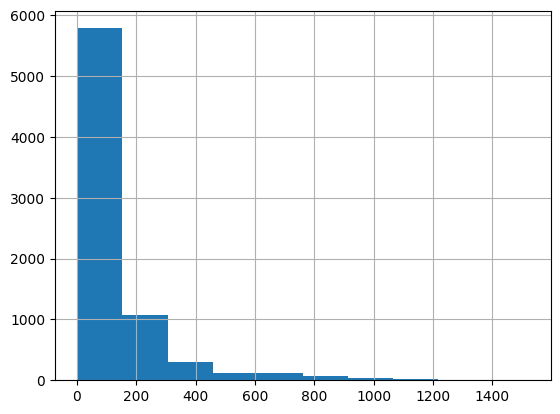

In [18]:
m_value = df_trans_1to10.groupby(["customer_id"])['amount'].apply(sum)
m_value.hist()

## RFM: recency

In [20]:
df_trans_1to10["trans_days"] = [
    (d - pd.Timestamp("1998-10-31")).days for d in df_trans_1to10["transaction_date"]
]


df_trans_1to10.head()

C:\Users\vanes\AppData\Local\Temp\ipykernel_2552\2135364415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_1to10["trans_days"] = [


,transaction_date,stock_date,product_id,customer_id,store_id,quantity,price,amount,trans_days
0,1998-01-01,12/25/1997,4,2439,10,3,3.64,10.92,-303
1,1998-01-01,12/28/1997,11,4284,10,3,3.51,10.53,-303
2,1998-01-01,12/28/1997,12,534,10,3,1.54,4.62,-303
3,1998-01-01,12/29/1997,14,9743,10,2,1.93,3.86,-303
4,1998-01-01,12/27/1997,16,3608,10,3,3.83,11.49,-303


In [21]:
r_trans_tmp = df_trans_1to10.groupby("customer_id")['trans_days'].unique()
r_trans_tmp

customer_id
3                                         [-216, -197]
6                                         [-288, -128]
8        [-243, -199, -150, -127, -106, -51, -36, -29]
9                                          [-187, -22]
10                            [-287, -247, -202, -140]
                             ...                      
10275                         [-248, -177, -167, -118]
10277                                 [-219, -39, -13]
10278                         [-246, -227, -221, -186]
10280                    [-254, -202, -146, -145, -69]
10281                          [-297, -130, -106, -91]
Name: trans_days, Length: 7532, dtype: object

<Axes: >

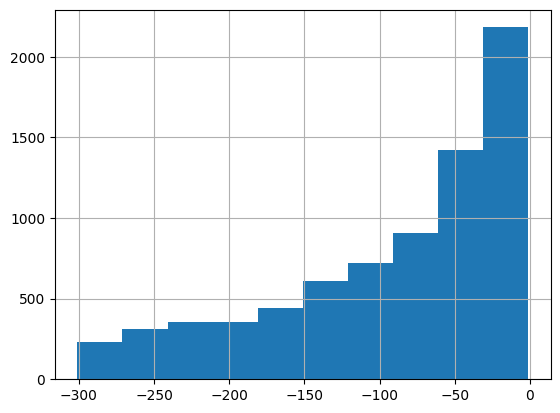

In [22]:
r_value = df_trans_1to10.groupby("customer_id")['trans_days'].max()
r_value.hist()

## RFM: frequency

<Axes: >

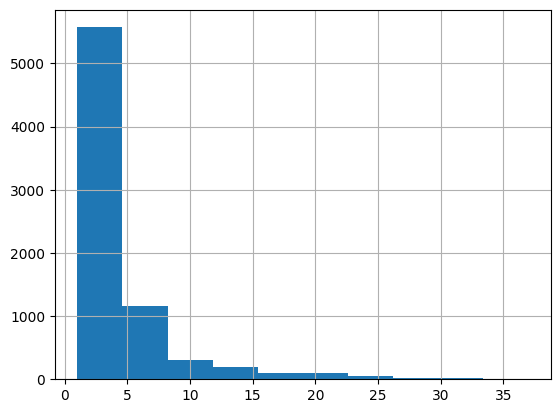

In [24]:
f_value = df_trans_1to10.groupby(["customer_id"])["transaction_date"].nunique()
f_value.hist()

# Observation: RFM 

In [26]:
df_user = pd.concat([f_value, m_value, r_value], axis=1)
df_user.columns = ["f","m","r"]

In [27]:
df_user.head()

,f,m,r
customer_id,,,
3,2,104.63,-197
6,2,46.98,-128
8,8,204.44,-29
9,2,89.58,-22
10,4,109.17,-140


In [28]:
def calculate_recency_score(recency):
    if recency >= -30:
        return 3
    elif -120 <= recency < -30:
        return 2
    elif -240 <= recency < -120 :
        return 1
    else:
        return 0


def calculate_frequency_score(frequency):
    if frequency > 25:
        return 3
    elif 15 < frequency <= 25:
        return 2
    elif 5 < frequency <= 15:
        return 1
    else:
        return 0


def calculate_monetary_score(monetary):
    if monetary > 800:
        return 3
    elif 400 < monetary <= 800:
        return 2
    elif 100 < monetary <= 400:
        return 1
    else:
        return 0



r_scores = r_value.apply(calculate_recency_score)
f_scores = f_value.apply(calculate_frequency_score)
m_scores = m_value.apply(calculate_monetary_score)


rfm_scores = pd.DataFrame({
    "Recency_Score": r_scores,
    "Frequency_Score": f_scores,
    "Monetary_Score": m_scores
})

print(rfm_scores.head())

             Recency_Score  Frequency_Score  Monetary_Score
customer_id                                                
3                        1                0               1
6                        1                0               0
8                        3                1               1
9                        3                0               0
10                       1                0               1


In [29]:
max_values = rfm_scores.max()
min_values = rfm_scores.min()


print("各列的最大值:")
print(max_values)

print("\n各列的最小值:")
print(min_values)


各列的最大值:
Recency_Score      3
Frequency_Score    3
Monetary_Score     3
dtype: int64

各列的最小值:
Recency_Score      0
Frequency_Score    0
Monetary_Score     0
dtype: int64


# RF熱力圖

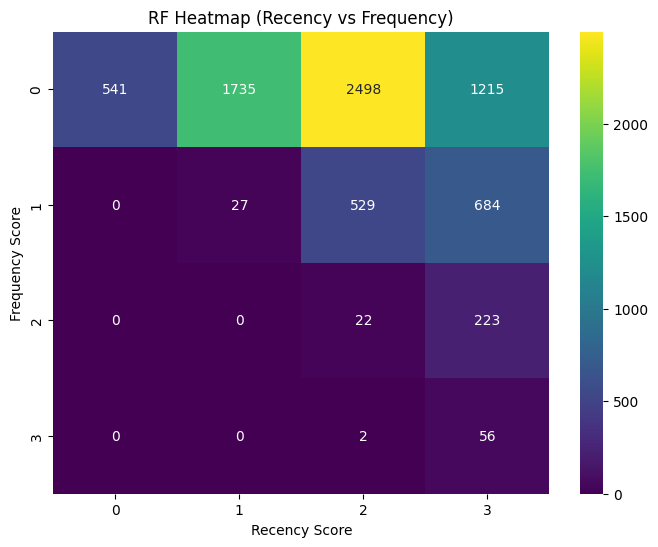

In [ ]:
import seaborn as sns

heatmap_data = rfm_scores.pivot_table(index="Frequency_Score", columns="Recency_Score", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt="d")  
plt.title("RF Heatmap (Recency vs Frequency)")
plt.xlabel("Recency Score")
plt.ylabel("Frequency Score")
plt.show()

# RM熱力圖

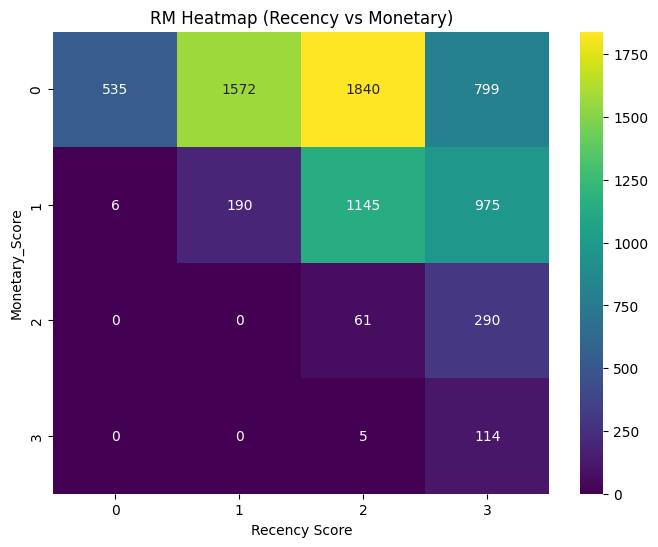

In [35]:
heatmap_data = rfm_scores.pivot_table(index="Monetary_Score", columns="Recency_Score", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt="d")  
plt.title("RM Heatmap (Recency vs Monetary)")
plt.xlabel("Recency Score")
plt.ylabel("Monetary_Score")
plt.show()

# FM熱力圖

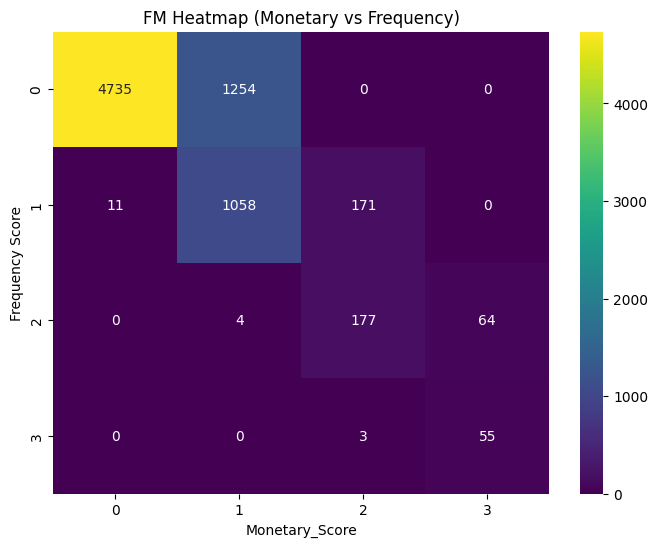

In [36]:
heatmap_data = rfm_scores.pivot_table(index="Frequency_Score", columns="Monetary_Score", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt="d")  
plt.title("FM Heatmap (Monetary vs Frequency)")
plt.xlabel("Monetary_Score")
plt.ylabel("Frequency Score")
plt.show()

<Axes: xlabel='r', ylabel='f'>

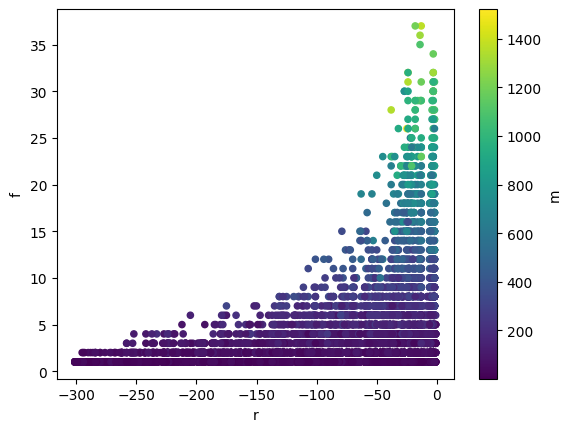

In [164]:
df_user.plot.scatter(y="f", x="r", c="m", colormap='viridis')

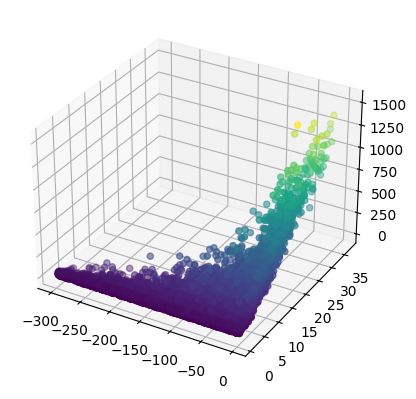

In [152]:
ax = plt.axes(projection='3d')
ax.scatter3D(df_user["r"], df_user["f"], df_user["m"], c=df_user["m"], cmap='viridis');

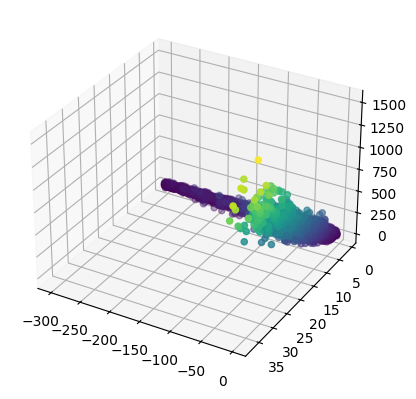

In [153]:
ax = plt.axes(projection='3d')
ax.scatter3D(df_user["r"], df_user["f"], df_user["m"], c=df_user["m"], cmap='viridis');
ax.invert_yaxis()

ax.view_init(elev, azim)：設定 3D 圖表的仰角 (elevation) 和方位角 (azimuth)，從而改變視角。

elev：仰角(elevation)，表示從 XY 平面向上或向下看的角度。

azim：方位角(azimuth)，表示在 XY 平面中旋轉的角度。

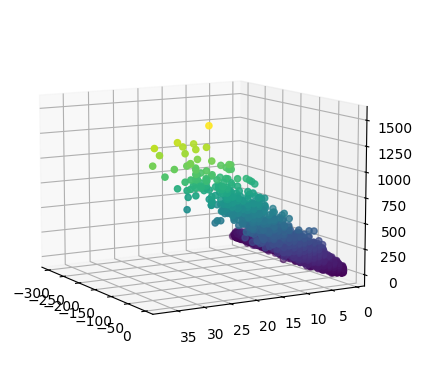

In [154]:
ax = plt.axes(projection='3d')
ax.scatter3D(df_user["r"], df_user["f"], df_user["m"], c=df_user["m"], cmap='viridis');
ax.invert_yaxis()
ax.view_init(elev=10,azim=-30)

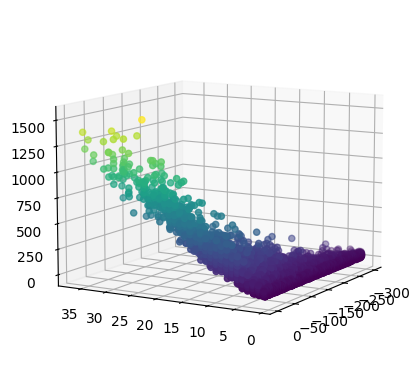

In [155]:
ax = plt.axes(projection='3d')
ax.scatter3D(df_user["r"], df_user["f"], df_user["m"], c=df_user["m"], cmap='viridis');
ax.invert_yaxis()
ax.view_init(elev=10,azim=30)

# K-means-Elbow

c:\Users\vanes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\vanes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\vanes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\vanes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (27). Pos

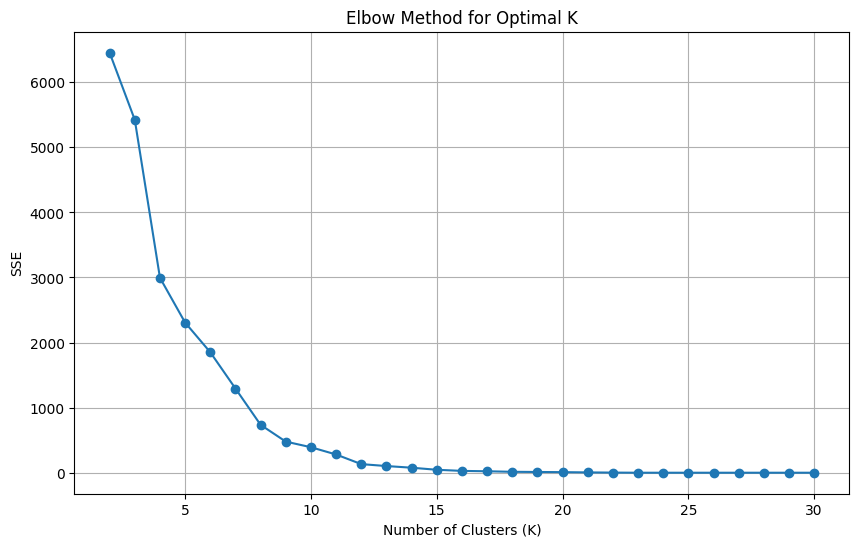

In [38]:
from sklearn.cluster import KMeans



X = rfm_scores[["Recency_Score", "Frequency_Score", "Monetary_Score"]]

k_values = range(2, 31)


sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

In [39]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(rfm_scores)
cluster_centers = kmeans.cluster_centers_


cluster_centers_df = pd.DataFrame(cluster_centers, columns=["Recency_Score", "Frequency_Score", "Monetary_Score"])
sorted_centers = cluster_centers_df.sort_values(by="Monetary_Score", ascending=False)


for i, center in sorted_centers.iterrows():
    print(f"中心點 C{i+1}: R={center['Recency_Score']:.2f}, F={center['Frequency_Score']:.2f}, M={center['Monetary_Score']:.2f}")

中心點 C2: R=2.98, F=0.96, M=1.39
中心點 C3: R=1.98, F=0.45, M=1.03
中心點 C1: R=0.76, F=-0.00, M=0.07
中心點 C4: R=2.30, F=0.00, M=-0.00


In [41]:
rfm_scores["Cluster"] = kmeans.labels_  


cluster_counts = rfm_scores["Cluster"].value_counts().sort_index()


for cluster, count in cluster_counts.items():
    print(f"C{cluster+1}: {count} 人")

C1: 2276 人
C2: 1403 人
C3: 1214 人
C4: 2639 人


In [42]:

c4_customers = rfm_scores[rfm_scores["Cluster"] == 3]

r_min, r_max = c4_customers["Recency_Score"].min(), c4_customers["Recency_Score"].max()
f_min, f_max = c4_customers["Frequency_Score"].min(), c4_customers["Frequency_Score"].max()
m_min, m_max = c4_customers["Monetary_Score"].min(), c4_customers["Monetary_Score"].max()

print(f"R_min: {r_min}, R_max: {r_max}")
print(f"F_min: {f_min}, F_max: {f_max}")
print(f"M_min: {m_min}, M_max: {m_max}")


R_min: 2, R_max: 3
F_min: 0, F_max: 1
M_min: 0, M_max: 0


In [47]:

c4_customer_purchases = pd.merge(c4_customers, df_cus, on="customer_id", how="inner")
